## EccentricIMR model
This model is developed in https://arxiv.org/abs/1709.02007 and is originally hosted at https://github.com/ianhinder/EccentricIMR. A copy of the model is placed in `gwModels/externals/EccentricIMR`. This model is developed by combining a PN inspiral waveform
model with a quasi-circular merger waveform model. The inspiral part of the waveform includes contributions up to 3PN order conservative and 2PN order reactive terms to the BBH dynamics. The complete model is calibrated to 23 numerical relativity (NR) simulations starting ~20 cycles before the merger with eccentricities e_ref≤0.08 and mass ratios q≤3, where e_ref is the eccentricity ~7 cycles before the merger. 

While the original implementation is in Mathematica, a python wrapper is provided in https://arxiv.org/abs/2403.03487 - which we have included in **gwModels**

In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import matplotlib.pyplot as plt
import numpy as np
import gwtools

# import gwModels
import sys
PATH_TO_GWMODELS = "/home/tousifislam/Documents/works/git_repos/gwModels/"
sys.path.append(PATH_TO_GWMODELS)
import gwModels

lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


Loaded NRHybSur3dq8 model


### Setup your mathematica kernel

To setup the Mathematica kkernel, we need to know the path to your Wolfram kernel and path to the directory containing the EccentricIMR package.

In [2]:
# Set the path to your Wolfram kernel 
# you will need Mathematica installed along with wolframclient
wolfram_kernel_path = '/home/tousifislam/Documents/Mathematica/ScriptDir/WolframKernel'

# Set the path to the directory containing the EccentricIMR package
package_directory = PATH_TO_GWMODELS + '/externals/EccentricIMR2017/'
# package_directory = '/home/tousifislam/.Mathematica/Applications/EccentricIMR/'

### Generate waveforms

In [3]:
# instantiate the EccentricIMR class - it may take some time
wf = gwModels.EccentricIMR(wolfram_kernel_path, package_directory)

#### 1. Eccentric waveforms

In [4]:
# Set the binary parameters
params = {"q": 1, # mass ratio
          "x0": 0.07, # reference initial dimensionless orbital frequency
          "e0": 0.1, # initial eccentricity
          "l0": 0, # initial mean anomaly
          "phi0": 0, # initial reference phase
          "t0": 0} # some initial reference time - not much relevant for us

# generate the waveform
tIMR, hIMR = wf.generate_waveform(params)

Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Exp[-1449.53] is too small to represent as a normalized machine number; precision may be lost.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Further output of MessageName[General, munfl] will be suppressed during this calculation.


Exp[-3517282.] is too small to represent as a normalized machine number; precision may be lost.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Exp[-1449.53] is too small to represent as a normalized machine number; precision may be lost.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Exp[-3517282.] is too small to represent as a normalized machine number; precision may be lost.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Exp[-1449.53] is too small to represent as a normalized machine number; precision may be lost.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Further output of MessageName[General, munfl] will be suppressed during this calculation.


Exp[-3517282.] is too small to represent as a normalized machine number; precision may be lost.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Exp[-1449.53] is too small to represent as a normalized machine number; precision may be lost.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Exp[-3517282.] is too small to represent as a normalized machine number; precision may be lost.


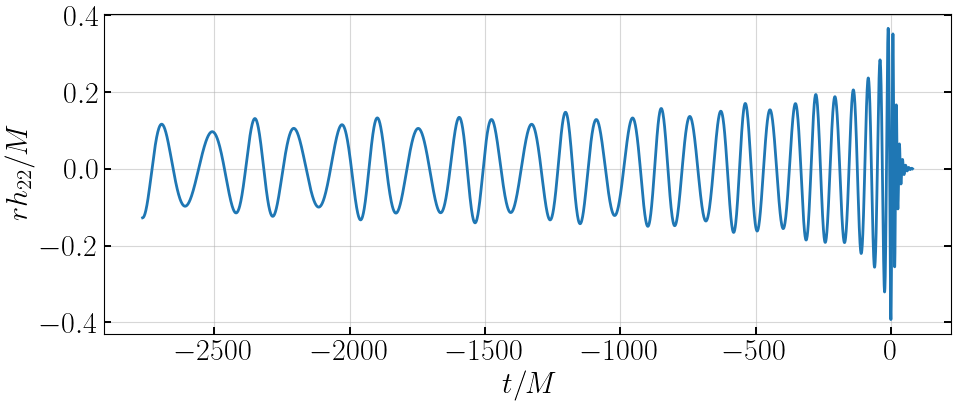

In [5]:
# plot waveform
plt.figure(figsize=(10,4.5))
plt.plot(tIMR, hIMR, '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{22}/M$')
plt.tight_layout()
plt.show()

#### 2. Circular waveforms

In [6]:
# Set the binary parameters
params = {"q": 1, # mass ratio
          "x0": 0.07, # reference initial dimensionless orbital frequency
          "e0": 0.0, # initial eccentricity
          "l0": 0, # initial mean anomaly
          "phi0": 0, # initial reference phase
          "t0": 0} # some initial reference time - not much relevant for us

# generate the waveform
tIMR_cir, hIMR_cir = wf.generate_waveform(params)

Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Exp[-3629701.] is too small to represent as a normalized machine number; precision may be lost.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Exp[-3629701.] is too small to represent as a normalized machine number; precision may be lost.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Exp[-3629701.] is too small to represent as a normalized machine number; precision may be lost.


Times[1.0, 0] is too small to represent as a normalized machine number; precision may be lost.


Exp[-3629701.] is too small to represent as a normalized machine number; precision may be lost.


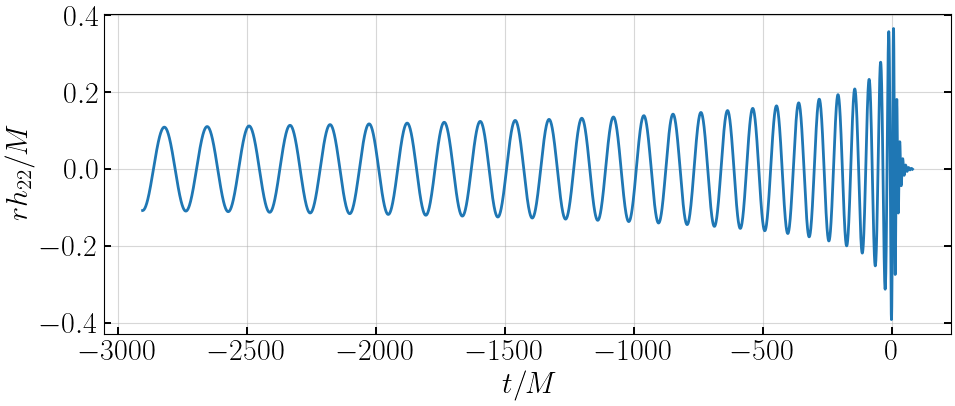

In [7]:
# plot waveform
plt.figure(figsize=(10,4.5))
plt.plot(tIMR_cir, hIMR_cir, '-', lw=2, label='EccentricIMR')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{22}/M$')
plt.tight_layout()
plt.show()

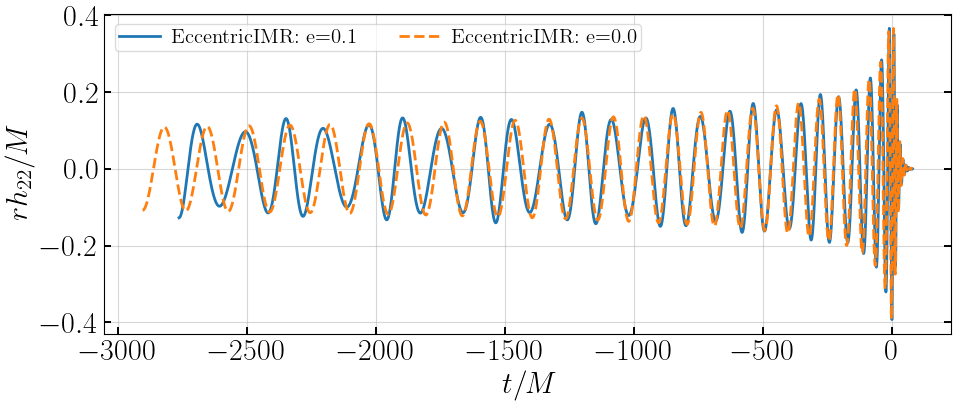

In [8]:
# plot waveform
plt.figure(figsize=(10,4.5))
plt.plot(tIMR, hIMR, '-', lw=2, label='EccentricIMR: e=0.1')
plt.plot(tIMR_cir, hIMR_cir, '--', lw=2, label='EccentricIMR: e=0.0')
plt.xlabel('$t/M$')
plt.ylabel('$rh_{22}/M$')
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

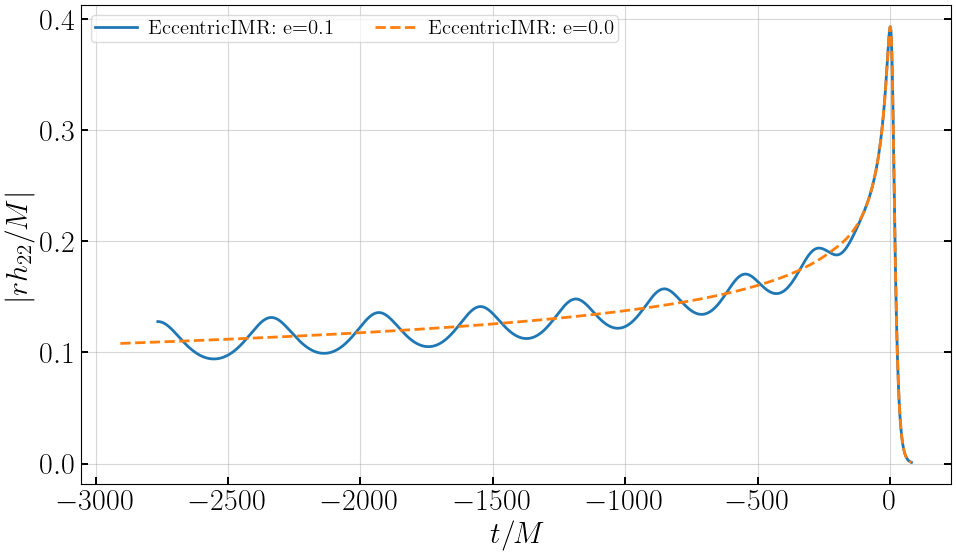

In [9]:
# plot amplitudes
plt.figure(figsize=(10,6))
plt.plot(tIMR, abs(hIMR), '-', lw=2, label='EccentricIMR: e=0.1')
plt.plot(tIMR_cir, abs(hIMR_cir), '--', lw=2, label='EccentricIMR: e=0.0')
plt.xlabel('$t/M$')
plt.ylabel('$|rh_{22}/M|$')
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

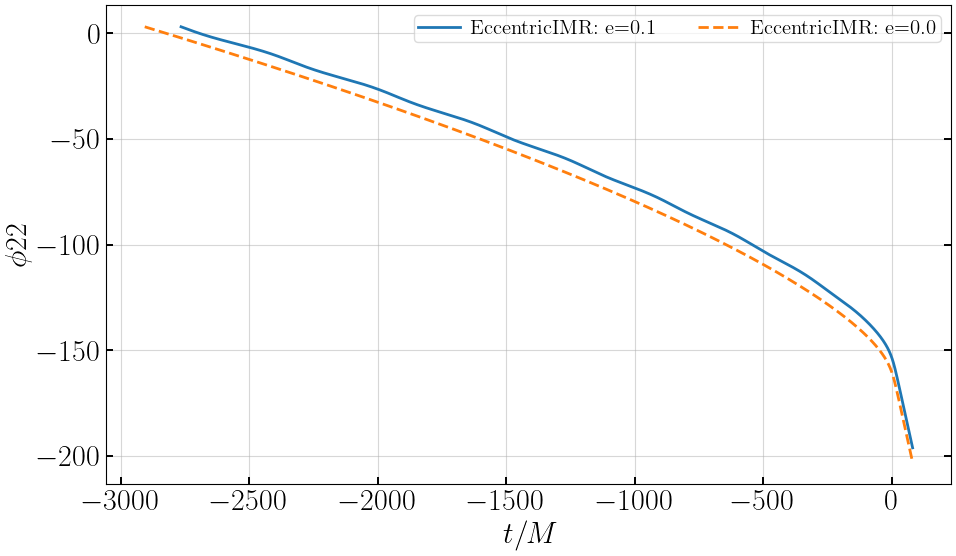

In [10]:
# plot phases
plt.figure(figsize=(10,6))
plt.plot(tIMR, gwtools.phase(hIMR), '-', lw=2, label='EccentricIMR: e=0.1')
plt.plot(tIMR_cir, gwtools.phase(hIMR_cir), '--', lw=2, label='EccentricIMR: e=0.0')
plt.xlabel('$t/M$')
plt.ylabel('$\\phi{22}$')
plt.legend(ncol=2)
plt.tight_layout()
plt.show()